In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("emails.csv")


In [3]:
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [4]:
df.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


<AxesSubplot:>

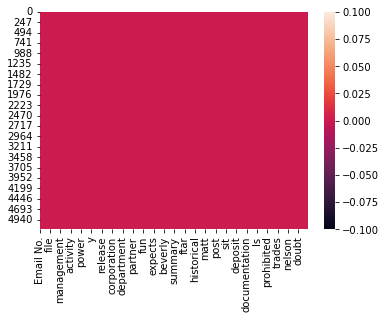

In [6]:
sns.heatmap(df.isnull())

In [7]:
df = df.iloc[:, 1:]

In [8]:
df.nunique()

the           90
to            72
ect           90
and           53
for           42
              ..
military       4
allowing       3
ff            23
dry            4
Prediction     2
Length: 3001, dtype: int64

<AxesSubplot:xlabel='Prediction', ylabel='Density'>

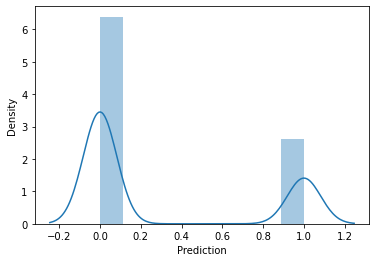

In [9]:
sns.distplot(df.Prediction)

In [10]:
df.iloc[:, :3000].values

array([[ 0,  0,  1, ...,  0,  0,  0],
       [ 8, 13, 24, ...,  0,  1,  0],
       [ 0,  0,  1, ...,  0,  0,  0],
       ...,
       [ 0,  0,  1, ...,  0,  0,  0],
       [ 2,  7,  1, ...,  0,  1,  0],
       [22, 24,  5, ...,  0,  0,  0]], dtype=int64)

In [11]:
y = df.iloc[:, -1].values
y

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [12]:
x = df.iloc[:, :3000].values
x

array([[ 0,  0,  1, ...,  0,  0,  0],
       [ 8, 13, 24, ...,  0,  1,  0],
       [ 0,  0,  1, ...,  0,  0,  0],
       ...,
       [ 0,  0,  1, ...,  0,  0,  0],
       [ 2,  7,  1, ...,  0,  1,  0],
       [22, 24,  5, ...,  0,  0,  0]], dtype=int64)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [14]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred))
    print("Recall : ", recall_score(y_test, y_pred))
    print("Accuracy Score : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred))
    print("\n", confusion_matrix(y_test, y_pred))
    print("")
    
    cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, y_pred), display_labels=['Spam', 'Not Spam'] )
    cm_display.plot()
    plt.show()

# Gaussian Naive Bayes Teoremi

In [15]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

GaussianNB()

In [16]:
GaussianNB()

GaussianNB()

In [17]:
y_pred_nb = model_nb.predict(x_test)


Precision :  0.9079497907949791
Recall :  0.9559471365638766
Accuracy Score :  0.9587628865979382
F1 Score :  0.9313304721030043

 [[1054   44]
 [  20  434]]



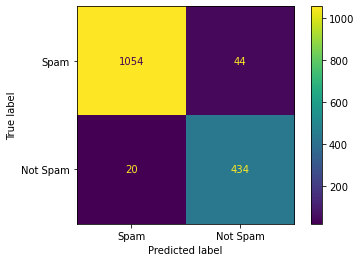

In [18]:
perform(y_pred_nb)


# Multinomial Naive Bayes Teoremi 

In [19]:
model_mnb = MultinomialNB()
model_mnb.fit(x_train, y_train)

MultinomialNB()

In [20]:
MultinomialNB()

MultinomialNB()

In [21]:
y_pred_mnb = model_mnb.predict(x_test)

Precision :  0.8732394366197183
Recall :  0.9559471365638766
Accuracy Score :  0.946520618556701
F1 Score :  0.9127234490010515

 [[1035   63]
 [  20  434]]



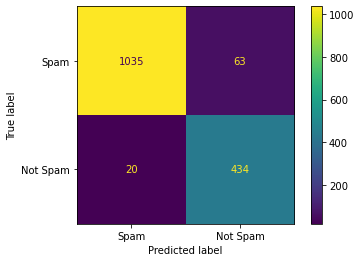

In [22]:
perform(y_pred_mnb)

# XGBoost Classifier

In [23]:
xgb = XGBClassifier().fit(x_train, y_train)


In [24]:
y_pred_xgb = xgb.predict(x_test)

Precision :  0.960352422907489
Recall :  0.960352422907489
Accuracy Score :  0.9768041237113402
F1 Score :  0.960352422907489

 [[1080   18]
 [  18  436]]



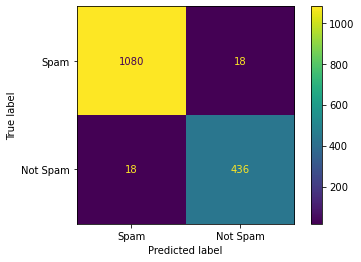

In [25]:
perform(y_pred_xgb)

# Decision Tree

In [26]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [27]:
y_pred_dt = model_dt.predict(x_test)

Precision :  0.8733624454148472
Recall :  0.8810572687224669
Accuracy Score :  0.9278350515463918
F1 Score :  0.8771929824561404

 [[1040   58]
 [  54  400]]



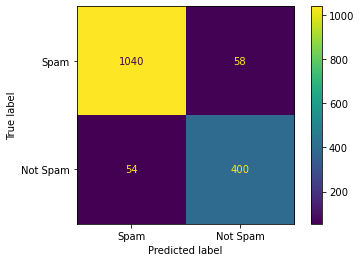

In [28]:
perform(y_pred_dt)

# Decision Tree Görselleştirme

In [29]:
feature_names = df.columns[0:3000]
viz = df.copy()
viz["Prediction"]=viz["Prediction"].values.astype(str)
print(viz.dtypes)
target_names = viz['Prediction'].unique().tolist()

the            int64
to             int64
ect            int64
and            int64
for            int64
               ...  
military       int64
allowing       int64
ff             int64
dry            int64
Prediction    object
Length: 3001, dtype: object


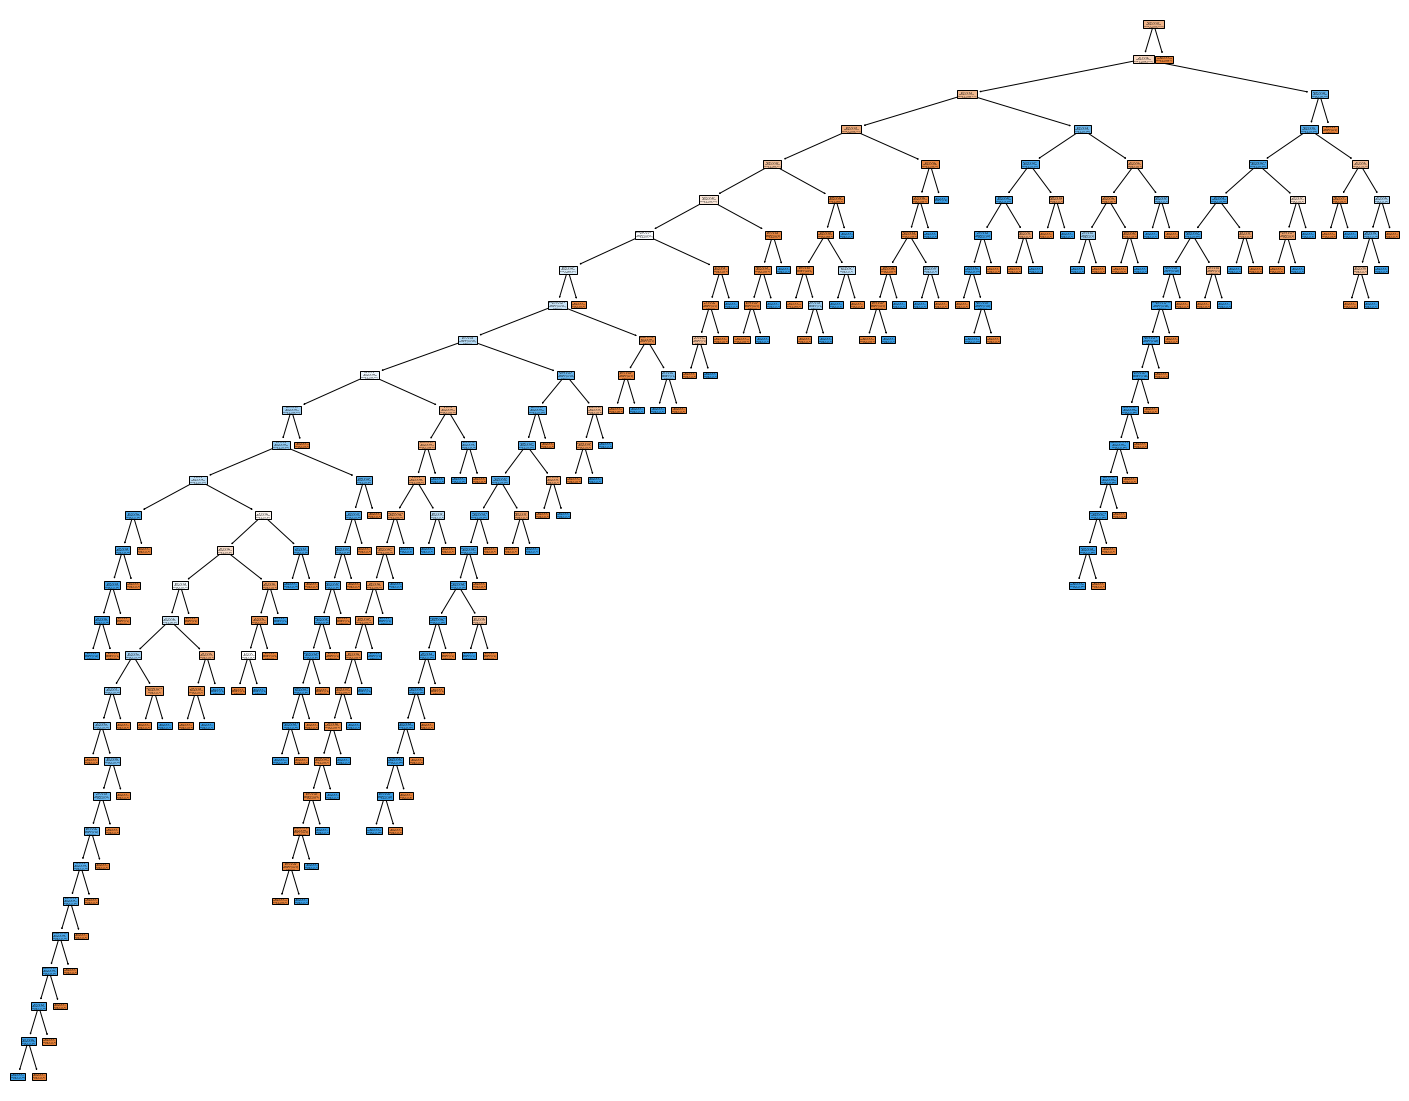

In [30]:
from sklearn.tree import plot_tree # tree diagram

plt.figure(figsize=(25, 20))
plot_tree(model_dt, feature_names = feature_names, class_names = target_names, filled = True, rounded = False)

plt.savefig('tree_visualization.png')

# Random Forest



In [31]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [32]:
y_pred_rf = model_rf.predict(x_test)

Precision :  0.9665924276169265
Recall :  0.9559471365638766
Accuracy Score :  0.9774484536082474
F1 Score :  0.9612403100775194

 [[1083   15]
 [  20  434]]



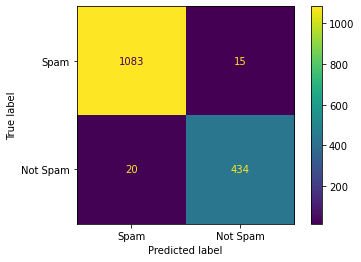

In [33]:
perform(y_pred_rf)

# Logistic Regresyon

In [34]:
model_lr = LogisticRegression(max_iter = 700)
model_lr.fit(x_train, y_train)

LogisticRegression(max_iter=700)

In [35]:
y_pred_lr = model_lr.predict(x_test)

Precision :  0.9488888888888889
Recall :  0.9405286343612335
Accuracy Score :  0.9677835051546392
F1 Score :  0.9446902654867257

 [[1075   23]
 [  27  427]]



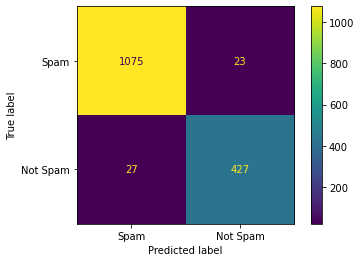

In [36]:
perform(y_pred_lr)

# Support Vector Clasifier

In [37]:
model_svc = SVC()
model_svc.fit(x_train, y_train)

SVC()

In [38]:
y_pred_svc = model_svc.predict(x_test)

Precision :  0.8541666666666666
Recall :  0.36123348017621143
Accuracy Score :  0.7951030927835051
F1 Score :  0.5077399380804953

 [[1070   28]
 [ 290  164]]



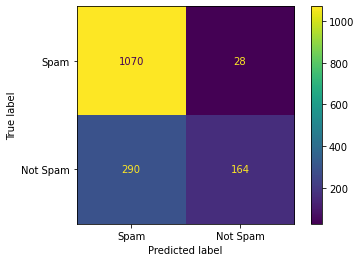

In [39]:
perform(y_pred_svc)

# KARŞILAŞTIRMA

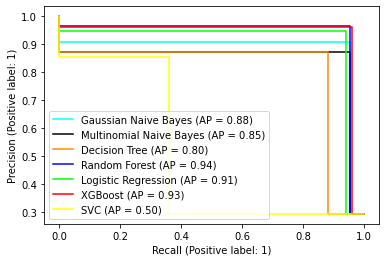

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
fig, ax = plt.subplots()
PrecisionRecallDisplay.from_predictions(y_test, y_pred_nb, name=f"Gaussian Naive Bayes", color="cyan", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_mnb, name=f"Multinomial Naive Bayes", color="black", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_dt, name=f"Decision Tree", color="darkorange", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_rf, name=f"Random Forest", color="blue", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_lr, name=f"Logistic Regression", color="lime", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_xgb, name=f"XGBoost", color="red", ax=ax)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_svc, name=f"SVC", color="yellow", ax=ax)